<a href="https://colab.research.google.com/github/vasuag09/house_price_prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Importing Dataset

In [4]:
data = pd.read_csv('data.csv')

In [5]:
data = data[data['price'] > 0]
data = data.dropna()

In [6]:
data['house_age'] = 2014 - data['yr_built']
data['renovated'] = (data['yr_renovated'] > 0).astype(int)

In [7]:
le = LabelEncoder()
data['city_encoded'] = le.fit_transform(data['city'])

In [8]:
data["total_sqft"] = data.sqft_living + data.sqft_lot + data.sqft_above + data.sqft_basement
features = ['bedrooms', 'bathrooms', 'floors',
            'waterfront', 'view', 'condition',
            'house_age', 'renovated', 'city_encoded',"total_sqft"]
X = data[features]
y = data['price']

In [9]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,house_age,renovated,city_encoded,total_sqft
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,...,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,59,1,36,10592
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,...,1921,0,709 W Blaine St,Seattle,WA 98119,USA,93,0,35,16350
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,...,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,48,0,18,15807
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,...,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,51,0,3,12030
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,...,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,38,1,31,14380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,...,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,60,1,35,9380
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,...,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,31,1,3,10493
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,...,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,5,0,32,13034
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,...,1974,0,5148 S Creston St,Seattle,WA 98178,USA,40,0,35,10810


In [10]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
feature_names = data.columns

# Combine and sort
feature_importance = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
for name, score in feature_importance:
    print(f"{name}: {score:.4f}")

price: 0.3562
condition: 0.2114
view: 0.1351
floors: 0.1225
sqft_living: 0.0443
date: 0.0433
bedrooms: 0.0428
sqft_lot: 0.0200
bathrooms: 0.0184
waterfront: 0.0060


In [11]:
data = data.drop(columns = ["date"])

In [12]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,yr_built,yr_renovated,street,city,statezip,country,house_age,renovated,city_encoded,total_sqft
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,59,1,36,10592
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,1921,0,709 W Blaine St,Seattle,WA 98119,USA,93,0,35,16350
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,48,0,18,15807
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,51,0,3,12030
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,38,1,31,14380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,60,1,35,9380
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,31,1,3,10493
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,5,0,32,13034
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,1974,0,5148 S Creston St,Seattle,WA 98178,USA,40,0,35,10810


In [13]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
            'house_age', 'renovated', 'city_encoded']
X = data[features]
y = data['price']

In [14]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,house_age,renovated,city_encoded
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,59,1,36
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,93,0,35
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,48,0,18
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,51,0,3
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,38,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,60,1,35
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,31,1,3
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,5,0,32
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,40,0,35


In [15]:
y

,price
0,3.130000e+05
1,2.384000e+06
2,3.420000e+05
3,4.200000e+05
4,5.500000e+05
...,...
4595,3.081667e+05
4596,5.343333e+05
4597,4.169042e+05
4598,2.034000e+05


In [16]:
X = np.array(X)

In [17]:
y = np.array(y)

In [18]:
X

array([[3.00e+00, 1.50e+00, 1.34e+03, ..., 5.90e+01, 1.00e+00, 3.60e+01],
       [5.00e+00, 2.50e+00, 3.65e+03, ..., 9.30e+01, 0.00e+00, 3.50e+01],
       [3.00e+00, 2.00e+00, 1.93e+03, ..., 4.80e+01, 0.00e+00, 1.80e+01],
       ...,
       [3.00e+00, 2.50e+00, 3.01e+03, ..., 5.00e+00, 0.00e+00, 3.20e+01],
       [4.00e+00, 2.00e+00, 2.09e+03, ..., 4.00e+01, 0.00e+00, 3.50e+01],
       [3.00e+00, 2.50e+00, 1.49e+03, ..., 2.40e+01, 0.00e+00, 9.00e+00]])

In [19]:
y

array([ 313000.      , 2384000.      ,  342000.      , ...,
        416904.166667,  203400.      ,  220600.      ])

## Splitting into training and test sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred_linear = linear_regressor.predict(X_test)

In [23]:
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Mean Absolute Error: {mae_linear:.2f}")
print(f"Mean Squared Error: {mse_linear:.2f}")
print(f"R² Score: {r2_linear:.2f}")

Mean Absolute Error: 146461.51
Mean Squared Error: 49511910194.41
R² Score: 0.56


In [24]:
cv_scores_linear = cross_val_score(linear_regressor, X, y, cv=5, scoring='r2')
print(f"Cross-validated R²: {cv_scores_linear.mean():.2f} ± {cv_scores_linear.std():.2f}")

Cross-validated R²: 0.48 ± 0.22


## Random Forest Regression

In [25]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators=100)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
y_pred = random_forest_regressor.predict(X_test)

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 147125.70
Mean Squared Error: 200792470984.45
R² Score: -0.78


In [28]:
cv_scores = cross_val_score(random_forest_regressor, X, y, cv=5, scoring='r2')
print(f"Cross-validated R²: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-validated R²: 0.22 ± 0.28


### Therefore we can conclude that the model works best on multiple regression with a prediction of 0.55 and a cross validation score of 0.48 ± 0.22


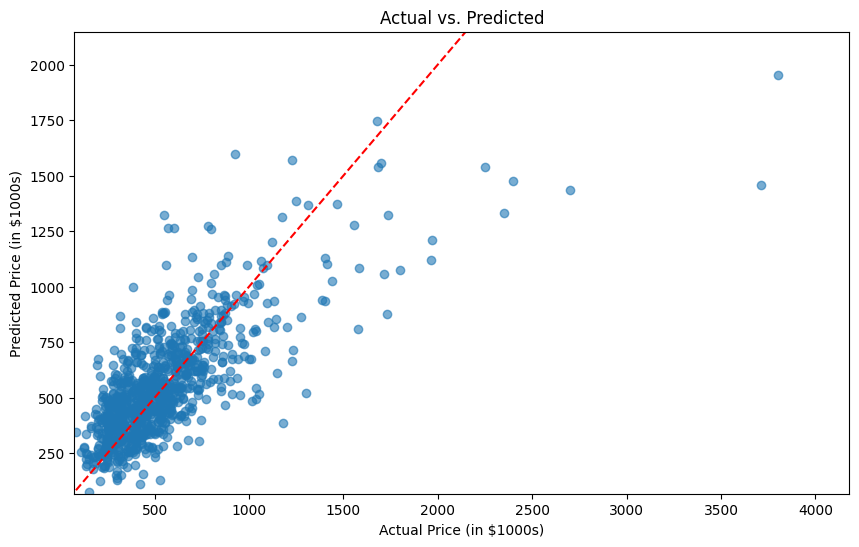

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Scale the prices to thousands
y_test_thousands = y_test / 1000
y_pred_thousands = y_pred_linear / 1000

plt.scatter(y_test_thousands, y_pred_thousands, alpha=0.6)

# Plot the diagonal line (y=x)
plt.plot([y_test_thousands.min(), y_test_thousands.max()],
         [y_test_thousands.min(), y_test_thousands.max()], 'r--')

# Set axis labels with units in thousands
plt.xlabel('Actual Price (in $1000s)')
plt.ylabel('Predicted Price (in $1000s)')

# Adjust axis limits to fit the data
plt.xlim(y_test_thousands.min() * 0.9, y_test_thousands.max() * 1.1)
plt.ylim(y_pred_thousands.min() * 0.9, y_pred_thousands.max() * 1.1)

# Add title
plt.title('Actual vs. Predicted')

# Show the plot
plt.show()